# Linear Regression

### Testing the Normal Equation
- This Equation is used to determine the value (0) that minimizes the cost fuction, a solution that gives the answer directly.
- We will generate some linear looking data to test this equation.

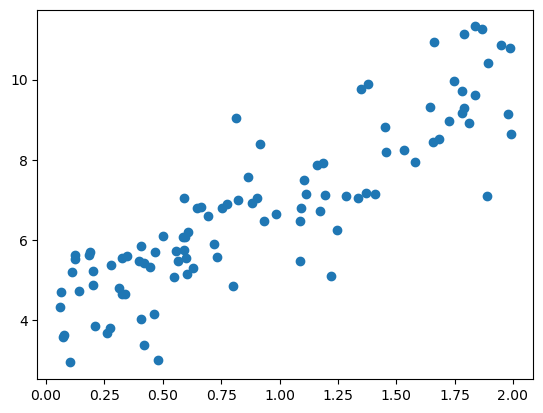

In [14]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1) # rand-generate random floats between 0 and 1 with 100 rows and 1 column * 2 so numbers btwn 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1) #randn generates normall distributed data, mean of 0 s.d of 1

# The code essentially creates a linear relationship between X and y with some added noise. The slope of this relationship is determined by 
# the coefficient 3 (in 3 * X), and the constant term is 4 (in 4 + ...). The noise term (np.random.randn(100, 1)) adds variability to the y values, 
#making the relationship appear less perfect.

plt.scatter(X, y)

In [16]:
# The data was generated by the equation y = 4 + 3x +  Gaussian noise.

X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

# we should hope answers 4 and 3 so as to recover the original parameters but this will be tricky considering the noise

array([[3.99600133],
       [3.00969908]])

In [18]:
# using the theta_best to make predictions.

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.99600133],
       [10.01539949]])

#### Summary so far.
- we have trained a linear regression model represented by the weights theta_best.
- we have new data points with the features values in X_new
- we added a bias term to the new data (X_new_b) to match the model's format.
- we multiply the new data with bias(X_new_b) by the model weights(theta_best) to get predictions for the target variable(y_predict)
- the values in y_predict represent the model's estimated target variable values for the given new feature values.

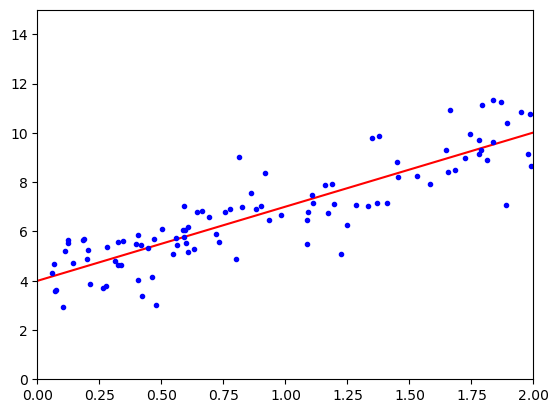

In [19]:
# Let's plot the model's predictions.

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Recreating the same process using scikit-learns linear regression model.

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.99600133]), array([[3.00969908]]))

In [21]:
lin_reg.predict(X_new)

array([[ 3.99600133],
       [10.01539949]])

- The linearregresiion equation is based off of scipy.linalg.lstsq() function (the least square) which can be called direcly as:

In [23]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.99600133],
       [3.00969908]])

In [24]:
# the above function simply computes the pseudoinverse of X ( the Moore-Penrose inverse)
# we can use the np.linalg.pinv() to compute the pseudoinverse directly:

np.linalg.pinv(X_b).dot(y)

array([[3.99600133],
       [3.00969908]])

- The pseudoinverse itself is computed using a standard matrix factorization technique called `Singular Value Decomposition`
- Computing the pseudoinverse is more efficient than computing the Normal Equation, it handles edge cases nicely, the Normal Equation
may not work if the matrix is singular (non-invertible) such as if m < n or if some features are redundant, but the pseudoinverse is always defined.

## Gradient Descent

- The general Idea is to tweak parameters iteratively to minimize a cost function.
- It does this by measuring the local gradient of the error fuction with regard to the parameter vector 0, and it goes in the direction
of descendng gradient. Once the gradient is zero we have reached a minimum.
- The model parameters are initialized randomly and get tweaked repeatedly to minimize the cost function, the learning step size is proportional to the slope of the cost function, so the steps gradually get smaller as the parameters approach the minimum.
- If the learning rate is too high you might jump across the valley which may make the algorithm diverge ending up with larger values every time failing to find a good solution.
- Depending on where you start ypu might end up at a local minimum instead of the global minimum -  if the learning stops too early we might never reac the global minimum.
- When using gradient decent you should ensure that all features have similar scale (using the StandardScaler class) or else it will take much longer to converge.
- Since the const function is convex in the case of a linear regression model ,the answer is simply at the bottom.

### Batch Gradient Descent
- Using partial derivatives we can calculate the gradient of the cost function with regard to each model parameter.
- This algorithm involves calculations over the full training set X, which will be very slow for large datasets but since it scales well its much faster than Normal Equation or SVD decomposition.
- Using the learning rate n we can determine the size of the downhill step needed.

In [26]:
# quick implementation of the algorithm.

eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) #random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[3.99600133],
       [3.00969908]])

- We can use grid serach to find a good learning rate , however we'll have to limit the number of iterations so the grid search can eliminate 
models that take too long to converge.
- A simple solution is to set a very high number of iterations but to interrupt the algorithm when the gradient vector becomes tiny - when the norm
becomes smaller than a tiny number e called the `tolerance` which normally happens when Gradient Descent hs (almost) reached the minimum.
- Dividing the tolerance by 10 may result in the algo taking about 10 times longer.

### Stochastic Gradient Descent

- Unlike the Batch Gradient Descent this picks a random instance in the training set at every step and computes the gradients based on a 
single instance in the training set and computes the gradients based on that single instance.
- It can be implemented as an out-of-core algorithm.
- The algorithms bounces around but once it settles the results are final parameter values are good but not optimal.
- It has a better chance of finding the global minimum point on the count of its bouncing around.
- The best solution to using it is gradually decreasing the learning rate so it settles at the minimum point - a process akin to `simulated annealing`.
- The function that determines the learning rate at each iteration is called `learning schedule`.

In [28]:
# Implementing the Stochastic Gradient Descent.

n_epochs = 50
t0, t1 = 5, 50  #learning schedule parameters.

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)   #random initialization.

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[3.9833538 ],
       [2.99298538]])

- The algorithm may not go through the entire data, to solve this you might want to shuffle the input features and the labels jointly
then go through it instance by instance the shuffle it again and so on, it will converge more slowly at this rate.

In [30]:
# Implementing this is Scikit-learn

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([3.89712561]), array([2.95855042]))

### Mini-batch Gradient Descent